In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Reading the dataset and changing the encoding to ISO-8859-1
df = pd.read_csv('Twitter_Dataset.csv', encoding = "ISO-8859-1")

In [3]:
# Checking the the dataset
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
# Adding the column names
df_cols  = ["sentiment", "ids", "date", "flag", "user", "text"]

In [5]:
# Adding the columns and reading the dataset again 
df = pd.read_csv('Twitter_Dataset.csv', encoding = "ISO-8859-1", names=df_cols)

In [6]:
# Checking the the result
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Removing the unnecessary columns.
df = df[['sentiment','text']]

# Replacing the sentiment value.
df['sentiment'] = df['sentiment'].replace(4,1)

In [8]:
# Checking the the result
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


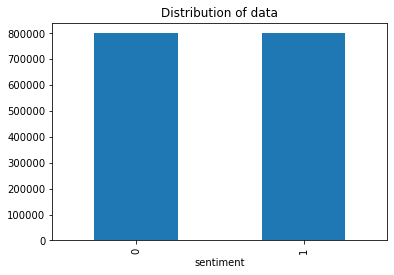

In [9]:
# Importing the the plotting library
import matplotlib.pyplot as plt

# Plotting the distribution for dataset.
bar_chart = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)

In [10]:
# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

In [11]:
# Defining dictionary containing all emojis
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Defining set containing all stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

<h2>Text Preprocessing</h2>

In [12]:
# Importing the Lemmatizer and the regular expression library
from nltk.stem import WordNetLemmatizer
import re

def preprocess(textdata):
    Textprocess = []
    
    # Creating the Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    url        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    user       = '@[^\s]+'
    alpha      = "[^a-zA-Z0-9]"
    sequence   = r"(.)\1\1+"
    seqReplace = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls.
        tweet = re.sub(url,' URL',tweet)
        
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji]) 
            
        # Replace @USERNAME.
        tweet = re.sub(user,' USER', tweet)  
        
        # Replace all non alphabets.
        tweet = re.sub(alpha, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letters.
        tweet = re.sub(sequence, seqReplace, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        Textprocess.append(tweetwords)
        
    return Textprocess

In [13]:
# Importing NLTK
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Processing text
Textprocess = preprocess(text)

<h2>Data Analyzing</h2>

In [15]:
# Importing the train_test_split library
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(Textprocess, sentiment,
                                                    test_size = 0.05, random_state = 0)

In [16]:
# Importing TF-IDF Vectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Using the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [17]:
# Transforming the X_train and X_test into a matrix of TF-IDF Features
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

<h2>Building the model to get the result</h2>

In [18]:
# Importing the seaborn, classification_report and confusion matrix libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Defining the model building method
def model_Evaluate(model):
    
    # Predicting the values for Testing
    y_pred = model.predict(X_test)

    # Printing the evaluation metrics.
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Negative','False Positive', 'False Negative','True Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")

<h2>Using two models</h2>

<h3>LinearSVC Model</h3>

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



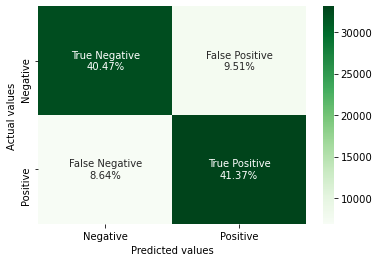

In [19]:
# Defining and fitting the model
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

<h3>Logistic Regression Model</h3>

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



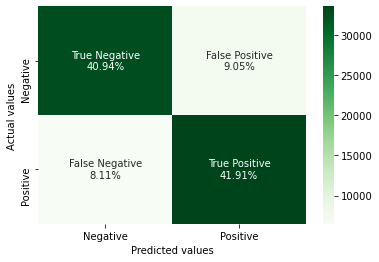

In [20]:
# Defining and fitting the model
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

<h2>Using the LinearSVC Model</h2>

In [21]:
# Defining the prediction method
def predict(vectoriser, model, text):
    # Predicting the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Making a list of the text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Converting the list into a standalone dataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [22]:
# Tesing with random sentences and showing the result
text = ["I hate Elon musk",
            "Among us",
            "The commodore is sus"]
    
df = predict(vectoriser, LRmodel, text)
print(df.head())

                   text sentiment
0      I hate Elon musk  Negative
1              Among us  Positive
2  The commodore is sus  Positive
